In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
ply.offline.init_notebook_mode(connected=True)
import plotly.express as px
from pandas_profiling import ProfileReport

# Getting the data

In [2]:
data = pd.read_csv('churn.csv')

In [3]:
data.shape

(10000, 14)

In [4]:
data.head(20)

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0           1    15634602   Hargrave          619    France  Female   42   
1           2    15647311       Hill          608     Spain  Female   41   
2           3    15619304       Onio          502    France  Female   42   
3           4    15701354       Boni          699    France  Female   39   
4           5    15737888   Mitchell          850     Spain  Female   43   
5           6    15574012        Chu          645     Spain    Male   44   
6           7    15592531   Bartlett          822    France    Male   50   
7           8    15656148     Obinna          376   Germany  Female   29   
8           9    15792365         He          501    France    Male   44   
9          10    15592389         H?          684    France    Male   27   
10         11    15767821     Bearce          528    France    Male   31   
11         12    15737173    Andrews          497     Spain    Male   24   
12         13    15632264        Kay          476    France  Female   34   
13         14    15691483       Chin          549    France  Female   25   
14         15    15600882      Scott          635     Spain  Female   35   
15         16    15643966    Goforth          616   Germany    Male   45   
16         17    15737452      Romeo          653   Germany    Male   58   
17         18    15788218  Henderson          549     Spain  Female   24   
18         19    15661507    Muldrow          587     Spain    Male   45   
19         20    15568982        Hao          726    France  Female   24   

    Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0        2       0.00              1          1               1   
1        1   83807.86              1          0               1   
2        8  159660.80              3          1               0   
3        1       0.00              2          0               0   
4        2  125510.82              1          1               1   
5        8  113755.78              2          1               0   
6        7       0.00              2          1               1   
7        4  115046.74              4          1               0   
8        4  142051.07              2          0               1   
9        2  134603.88              1          1               1   
10       6  102016.72              2          0               0   
11       3       0.00              2          1               0   
12      10       0.00              2          1               0   
13       5       0.00              2          0               0   
14       7       0.00              2          1               1   
15       3  143129.41              2          0               1   
16       1  132602.88              1          1               0   
17       9       0.00              2          1               1   
18       6       0.00              1          0               0   
19       6       0.00              2          1               1   

    EstimatedSalary  Exited  
0         101348.88       1  
1         112542.58       0  
2         113931.57       1  
3          93826.63       0  
4          79084.10       0  
5         149756.71       1  
6          10062.80       0  
7         119346.88       1  
8          74940.50       0  
9          71725.73       0  
10         80181.12       0  
11         76390.01       0  
12         26260.98       0  
13        190857.79       0  
14         65951.65       0  
15         64327.26       0  
16          5097.67       1  
17         14406.41       0  
18        158684.81       0  
19         54724.03       0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

# Exploratory Data Analysis 

In [7]:
profile = ProfileReport(data,title="Bank data",explorative=True)
profile

#### Question 1: Which Country makes for the largest customer base?

In [7]:
freq_table = data.groupby(['Geography']).size().reset_index(name='Count').rename(columns={'Geography':'Country'})
freq_table

Country  Count
0   France   5014
1  Germany   2509
2    Spain   2477

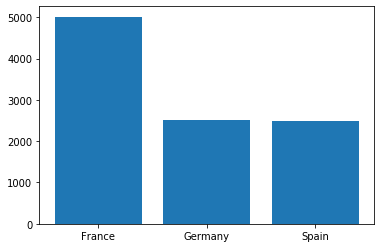

In [8]:
plt.bar(freq_table['Country'], freq_table['Count'])
plt.show()

France has the largest number of clients
However the above information is not enough since we do not necessarily know their gender

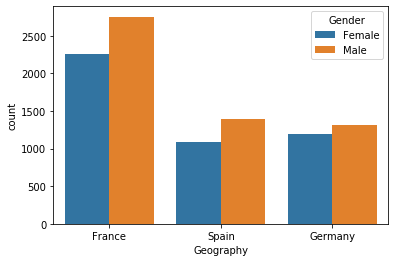

In [9]:
sns.countplot(x="Geography", hue="Gender", data=data);

We can see that there are generally more male than female clients in each country
However how many clients are active in each country?

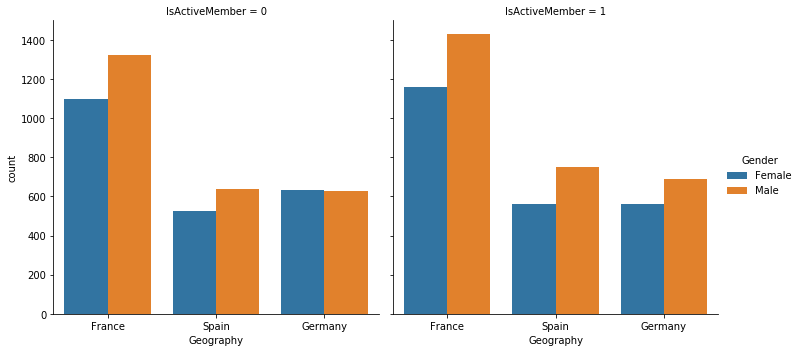

In [10]:
sns.catplot(x="Geography", hue="Gender", col="IsActiveMember",data=data, kind="count");

France has the highest number of active members a majority of them being male

The trend is that there are more active males than females in all countries

Spain and France have a higher number of inactive males than females

It is also worth noting that the number of inactive clients in all countries is quite high indicating there might be a problem in service deliverym

#### Question 2: How many clients Exited/Churned 

In [11]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [12]:
%pylab inline
names=['No','Yes']
values=data.Exited.value_counts()
fig = px.pie(data, values=values, title='Churned',names=names)
fig.show()

Populating the interactive namespace from numpy and matplotlib


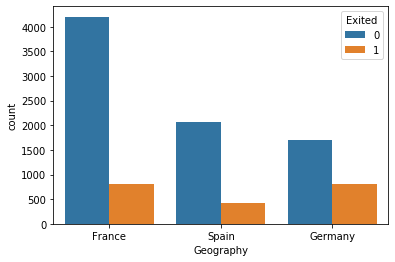

In [13]:
#We can now use this to see the individual nation's ratio of exiting
sns.countplot(x='Geography', hue = 'Exited', data = data);


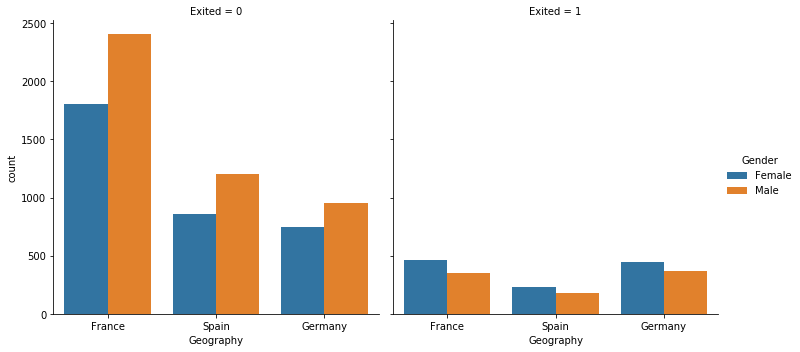

In [14]:
sns.catplot(x="Geography", hue="Gender", col="Exited",data=data, kind="count");

It is clear that more females exited than males in each country

Germany and Spain have the highest number of Exiting Clients but Germany has the highest percentage of lost clients

#### Question 3: What factors contributed to the exiting of clients 

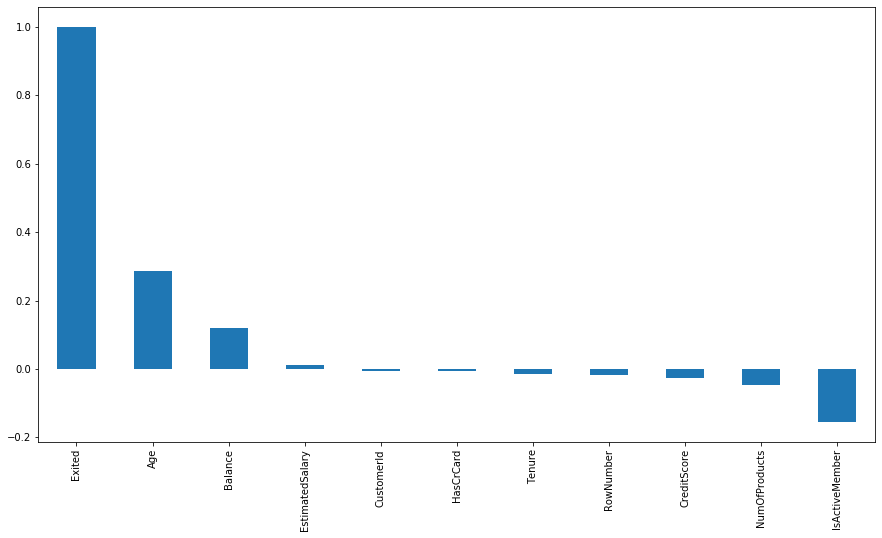

In [15]:
plt.figure(figsize=(15,8))
data.corr()['Exited'].sort_values(ascending = False).plot(kind='bar')

Seemingly Age and Active Membership seem to contribute to the Exiting or retention of clients respectively

However the correlation listed above may not necessarily indicate that the above traits directly cause or influence the retention of clients
Refer to correlation and causation

Also it should be noted that the plot above only shows the correlation between integer type of values

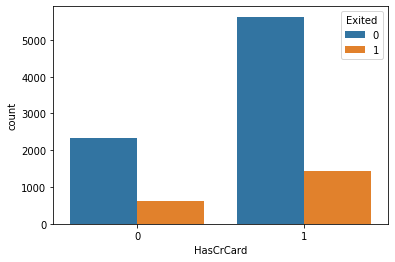

In [16]:
#We proceed to further investigate the different variables and their relationship to Exiting
sns.countplot(x='HasCrCard', hue = 'Exited',data = data,)

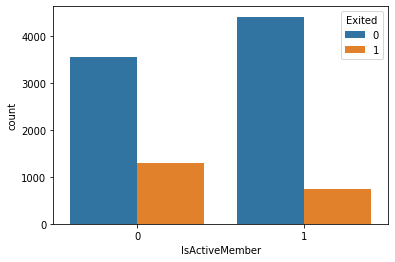

In [17]:
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data)

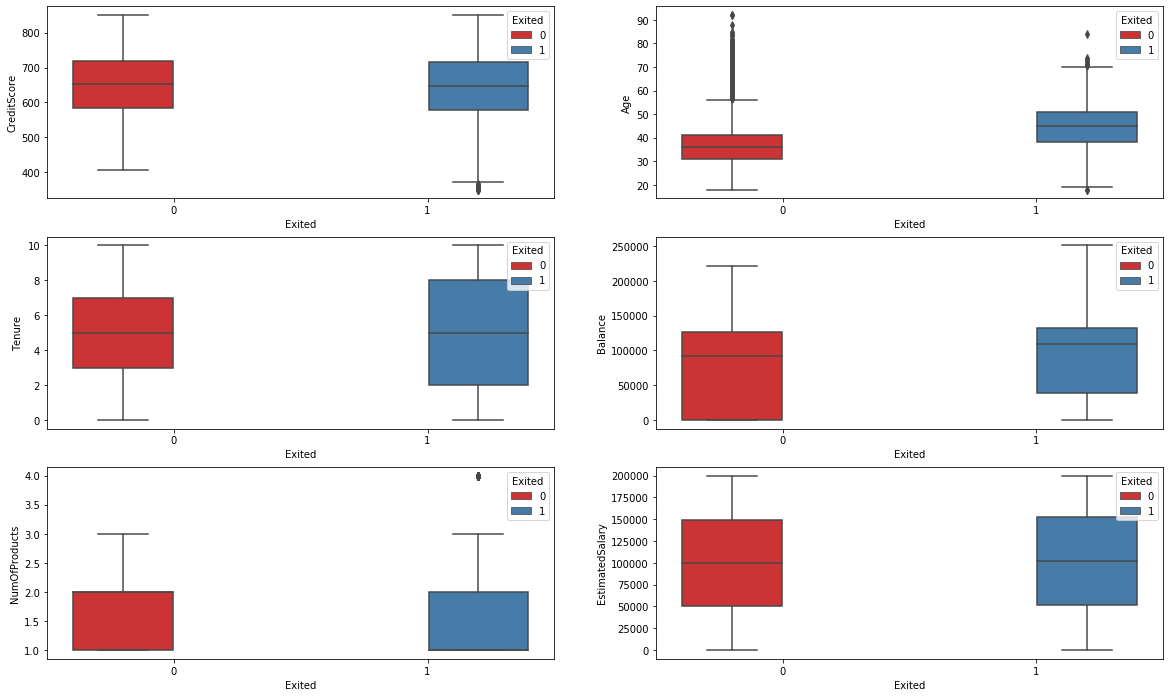

In [18]:

fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited', palette='Set1',data = data, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited', palette='Set1', data = data , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited', palette='Set1', data = data, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited', palette='Set1', data = data, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited', palette='Set1', data = data, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited', palette='Set1', data = data, ax=axarr[2][1])


There is little to no difference in the credit score distribution between retained and exited customers.
    
The bank is losing customers with big bank balances.
    
Neither the product nor the salary has a huge effect on the exit rate.


#### Question 4: What is the relationship between Active Membership, Exiting and Age

<Figure size 1080x720 with 0 Axes>

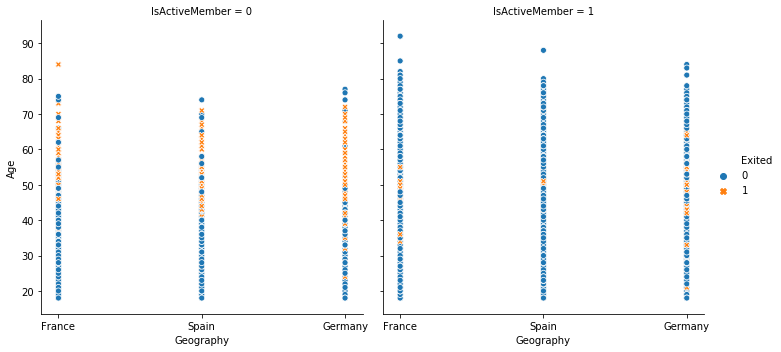

In [19]:
#use a scatterplot to demonstrate the relationships between the three variables
plt.figure(figsize=(15,10))
sns.relplot(x='Geography', y='Age', hue='Exited',col='IsActiveMember', style='Exited', data=data);

#fig = px.scatter(data, x="Geography", y="Age", color="Exited", hover_data=['IsActiveMember'])
          
#fig.show()


From the above scatterplot we can see that the exit rate is lower for youths(age 20-35) irregardless of how active or inactive they are

The trend is that inactive clients between ages 40-90 have a high tendency of leaving/exiting

Germany has the largest number of inactive clients who left between age 40-70

Germany also has active youths aged 20 and 35 exiting 

Spain has few active members aged 50 who exited

# Data Pre-Processing and Feature Engineering 

## Types of variables

In [20]:
#the general method of finding the datatypes found within the dataset
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [21]:
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 3 categorical variables


In [22]:
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 11 numerical variables


In [23]:
discrete = []

for var in numerical:
    if len(data[var].unique())<20:
        print(var, ' values: ', data[var].unique())
        discrete.append(var)
print()
print('There are {} discrete variables'.format(len(discrete)))

Tenure  values:  [ 2  1  8  7  4  6  3 10  5  9  0]
NumOfProducts  values:  [1 3 2 4]
HasCrCard  values:  [1 0]
IsActiveMember  values:  [1 0]
Exited  values:  [1 0]

There are 5 discrete variables


In [24]:
numerical = [var for var in numerical if var not in discrete and var not in ['CustomerId', 'EstimatedSalary']]
print('There are {} numerical and continuous variables'.format(len(numerical)))

There are 4 numerical and continuous variables


## Checking for missing values 

In [25]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Categorical Variables

In [26]:
#we first list the categorical variables that exist
categorical

['Surname', 'Geography', 'Gender']

In [27]:
#we then proceed to find the number of categories in each variable
data.groupby(['Geography']).count()

RowNumber  CustomerId  Surname  CreditScore  Gender   Age  Tenure  \
Geography                                                                      
France          5014        5014     5014         5014    5014  5014    5014   
Germany         2509        2509     2509         2509    2509  2509    2509   
Spain           2477        2477     2477         2477    2477  2477    2477   

           Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
Geography                                                                       
France        5014           5014       5014            5014             5014   
Germany       2509           2509       2509            2509             2509   
Spain         2477           2477       2477            2477             2477   

           Exited  
Geography          
France       5014  
Germany      2509  
Spain        2477

In [28]:
data.groupby(['Gender']).count()

RowNumber  CustomerId  Surname  CreditScore  Geography   Age  Tenure  \
Gender                                                                         
Female       4543        4543     4543         4543       4543  4543    4543   
Male         5457        5457     5457         5457       5457  5457    5457   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
Gender                                                                       
Female     4543           4543       4543            4543             4543   
Male       5457           5457       5457            5457             5457   

        Exited  
Gender          
Female    4543  
Male      5457

In [29]:
data.groupby(['Surname']).count()

RowNumber  CustomerId  CreditScore  Geography  Gender  Age  Tenure  \
Surname                                                                        
Abazu             2           2            2          2       2    2       2   
Abbie             1           1            1          1       1    1       1   
Abbott            4           4            4          4       4    4       4   
Abdullah          1           1            1          1       1    1       1   
Abdulov           2           2            2          2       2    2       2   
...             ...         ...          ...        ...     ...  ...     ...   
Zubarev           3           3            3          3       3    3       3   
Zubareva          1           1            1          1       1    1       1   
Zuev              1           1            1          1       1    1       1   
Zuyev             2           2            2          2       2    2       2   
Zuyeva            2           2            2          2       2    2       2   

          Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
Surname                                                                        
Abazu           2              2          2               2                2   
Abbie           1              1          1               1                1   
Abbott          4              4          4               4                4   
Abdullah        1              1          1               1                1   
Abdulov         2              2          2               2                2   
...           ...            ...        ...             ...              ...   
Zubarev         3              3          3               3                3   
Zubareva        1              1          1               1                1   
Zuev            1              1          1               1                1   
Zuyev           2              2          2               2                2   
Zuyeva          2              2          2               2                2   

          Exited  
Surname           
Abazu          2  
Abbie          1  
Abbott         4  
Abdullah       1  
Abdulov        2  
...          ...  
Zubarev        3  
Zubareva       1  
Zuev           1  
Zuyev          2  
Zuyeva         2  

[2932 rows x 13 columns]

Text(0, 0.5, 'Number of different categories')

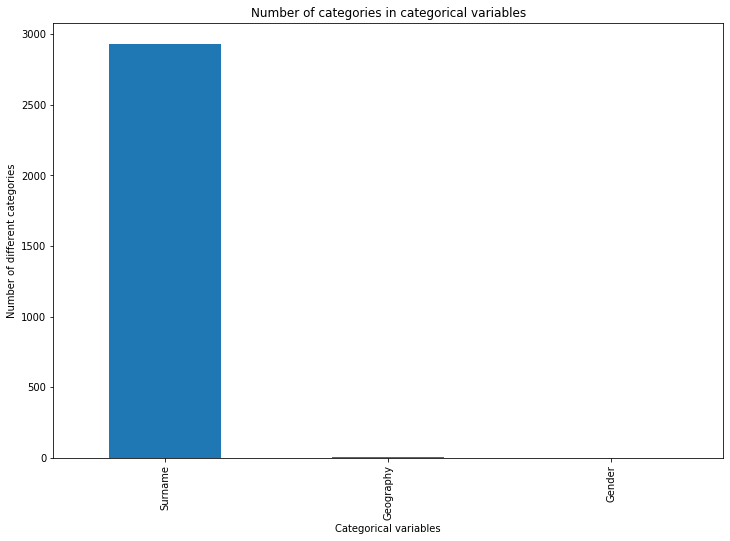

In [30]:
#alternatively we can use cardinality to come to the same conclusion
labels = []
for var in categorical:
    labels.append(len(data[var].unique()))
    
 
tmp = pd.Series(labels)
tmp.index = pd.Series(categorical)
tmp.plot.bar(figsize=(12,8))
plt.title('Number of categories in categorical variables')
plt.xlabel('Categorical variables')
plt.ylabel('Number of different categories')

In [31]:
#surname column has too many categories so it becomes obsolete
#so we will drop it 


## Dropping unwanted data 

In [32]:
data_new = data.drop(['CustomerId', 'RowNumber','Surname'], axis=1)

In [33]:
data_new.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

## Dummy encoding using Pandas

In [34]:
#Converting all the categorical variables into dummy variables
data_dummies = pd.get_dummies(data_new)
data_dummies.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1                 1   
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
3               0         93826.63       0                 1   
4               1         79084.10       0                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0  
1                  0                1              1            0  
2                  0                0              1            0  
3                  0                0              1            0  
4                  0                1              1            0

In [35]:
#make sure it's all numerical, check again for datatypes
data_dummies.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Female          uint8
Gender_Male            uint8
dtype: object

## Feature Selection(Filter Method) 

In [36]:
data_dummies.corr()

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore           1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                  -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure                0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance               0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts         0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard            -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember        0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary      -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited               -0.027094  0.285323 -0.014001  0.118533      -0.047820   
Geography_France     -0.008928 -0.039208 -0.002848 -0.231329       0.001230   
Geography_Germany     0.005538  0.046897 -0.000567  0.401110      -0.010419   
Geography_Spain       0.004780 -0.001685  0.003868 -0.134892       0.009039   
Gender_Female         0.002857  0.027544 -0.014733 -0.012087       0.021859   
Gender_Male          -0.002857 -0.027544  0.014733  0.012087      -0.021859   

                   HasCrCard  IsActiveMember  EstimatedSalary    Exited  \
CreditScore        -0.005458        0.025651        -0.001384 -0.027094   
Age                -0.011721        0.085472        -0.007201  0.285323   
Tenure              0.022583       -0.028362         0.007784 -0.014001   
Balance            -0.014858       -0.010084         0.012797  0.118533   
NumOfProducts       0.003183        0.009612         0.014204 -0.047820   
HasCrCard           1.000000       -0.011866        -0.009933 -0.007138   
IsActiveMember     -0.011866        1.000000        -0.011421 -0.156128   
EstimatedSalary    -0.009933       -0.011421         1.000000  0.012097   
Exited             -0.007138       -0.156128         0.012097  1.000000   
Geography_France    0.002467        0.003317        -0.003332 -0.104955   
Geography_Germany   0.010577       -0.020486         0.010297  0.173488   
Geography_Spain    -0.013480        0.016732        -0.006482 -0.052667   
Gender_Female      -0.005766       -0.022544         0.008112  0.106512   
Gender_Male         0.005766        0.022544        -0.008112 -0.106512   

                   Geography_France  Geography_Germany  Geography_Spain  \
CreditScore               -0.008928           0.005538         0.004780   
Age                       -0.039208           0.046897        -0.001685   
Tenure                    -0.002848          -0.000567         0.003868   
Balance                   -0.231329           0.401110        -0.134892   
NumOfProducts              0.001230          -0.010419         0.009039   
HasCrCard                  0.002467           0.010577        -0.013480   
IsActiveMember             0.003317          -0.020486         0.016732   
EstimatedSalary           -0.003332           0.010297        -0.006482   
Exited                    -0.104955           0.173488        -0.052667   
Geography_France           1.000000          -0.580359        -0.575418   
Geography_Germany         -0.580359           1.000000        -0.332084   
Geography_Spain           -0.575418          -0.332084         1.000000   
Gender_Female             -0.006772           0.024628        -0.016889   
Gender_Male                0.006772          -0.024628         0.016889   

                   Gender_Female  Gender_Male  
CreditScore             0.002857    -0.002857  
Age                     0.027544    -0.027544  
Tenure                 -0.014733     0.014733  
Balance                -0.012087     0.012087  
NumOfProducts           0.021859    -0.021859  
HasCrCard              -0.005766     0.005766  
IsActiveMember         -0.022544     0.022544  
EstimatedSalary         0.008112    -0.008112  
Exited                  0.106512    -0.106512  
Geography_France       -0.006772     0.006772  
Geography_Germany       0.024628    -0.024628  
Geogr

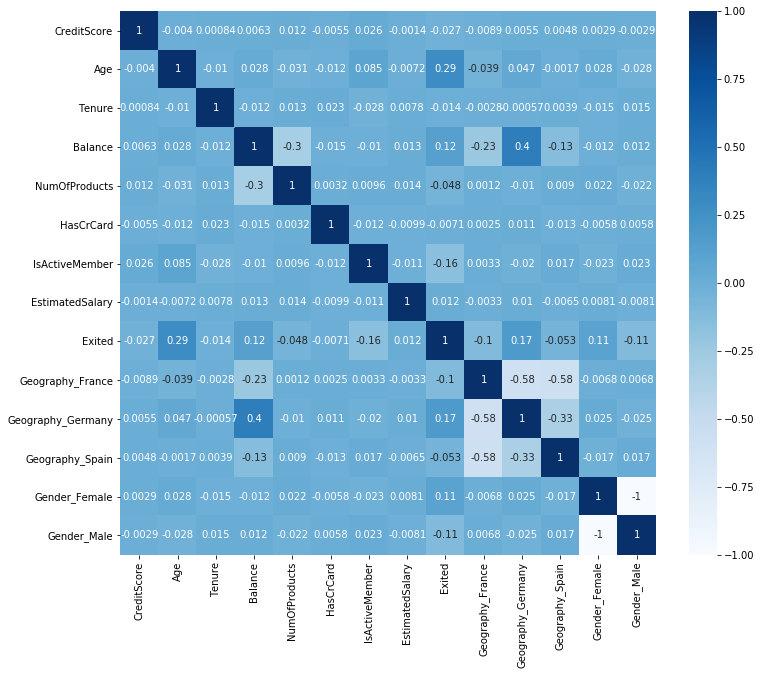

In [37]:
plt.figure(figsize=(12,10))
cor = data_dummies.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [38]:
cor_target = abs(cor["Exited"])
cor_target 

CreditScore          0.027094
Age                  0.285323
Tenure               0.014001
Balance              0.118533
NumOfProducts        0.047820
HasCrCard            0.007138
IsActiveMember       0.156128
EstimatedSalary      0.012097
Exited               1.000000
Geography_France     0.104955
Geography_Germany    0.173488
Geography_Spain      0.052667
Gender_Female        0.106512
Gender_Male          0.106512
Name: Exited, dtype: float64

In [39]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.15]
relevant_features

Age                  0.285323
IsActiveMember       0.156128
Exited               1.000000
Geography_Germany    0.173488
Name: Exited, dtype: float64

In [40]:
#FINDING OUT IF THESE FEATURES ARE CORRELATED TO EACH OTHER
print(data_dummies[["Age","IsActiveMember"]].corr())
print(data_dummies[["Age","Geography_Germany"]].corr())

                     Age  IsActiveMember
Age             1.000000        0.085472
IsActiveMember  0.085472        1.000000
                        Age  Geography_Germany
Age                1.000000           0.046897
Geography_Germany  0.046897           1.000000


It is clear this method is not accurate because it only selects three features from the whole dataset and we cannot work with such values to create an accurate model

### Splitting the data  

In [41]:
X= data_dummies.drop('Exited',axis=1)

In [42]:
y= data_dummies['Exited']

In [43]:
# Split Train, test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=0)
X_train.shape, X_test.shape



((9000, 13), (1000, 13))

In [44]:
X_train

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
1554          628   34       4  158741.43              2          1   
2087          716   52       7   65971.61              2          1   
5470          617   25       1  102585.88              2          1   
2363          571   33       9       0.00              2          0   
7570          697   32       7  175464.85              3          1   
...           ...  ...     ...        ...            ...        ...   
9225          594   32       4  120074.97              2          1   
4859          794   22       4  114440.24              1          1   
3264          738   35       5  161274.05              2          1   
9845          590   38       9       0.00              2          1   
2732          623   48       1  108076.33              1          1   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
1554               1        126192.54                 1                  0   
2087               0         14608.00                 1                  0   
5470               1        115387.40                 1                  0   
2363               1         77519.62                 1                  0   
7570               0        116442.42                 1                  0   
...              ...              ...               ...                ...   
9225               1        162961.79                 0                  1   
4859               1        107753.07                 0                  0   
3264               0        181429.87                 1                  0   
9845               1        148750.16                 0                  0   
2732               0        118855.26                 0                  1   

      Geography_Spain  Gender_Female  Gender_Male  
1554                0              0            1  
2087                0              1            0  
5470                0              0            1  
2363                0              1            0  
7570                0              0            1  
...               ...            ...          ...  
9225                0              1            0  
4859                1              1            0  
3264                0              0            1  
9845                1              1            0  
2732                0              1            0  

[9000 rows x 13 columns]

In [45]:
from sklearn.preprocessing import MinMaxScaler
# fit scaler
scaler = MinMaxScaler() # create an instance
scaler.fit(X_train) #  fit  the scaler to the train set for later use

MinMaxScaler(copy=True, feature_range=(0, 1))

## Feature Selection(RFE) 

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False  True False  True  True  True  True
  True]
[5 2 4 6 1 3 1 7 1 1 1 1 1]


In [47]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 9
Score with 9 features: 0.154315


In [48]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')


## Feature Selection(Backward Elimination) 

In [49]:
import statsmodels.api as sm
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const                 2.761196e-02
CreditScore           1.464722e-02
Age                  1.447281e-203
Tenure                1.381113e-01
Balance               5.124563e-06
NumOfProducts         1.975239e-02
HasCrCard             5.442854e-01
IsActiveMember        3.086602e-78
EstimatedSalary       2.890420e-01
Geography_France      3.003506e-14
Geography_Germany     2.332578e-13
Geography_Spain       2.840859e-10
Gender_Female         8.809683e-02
Gender_Male           5.287714e-09
dtype: float64

In [50]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']


We proceed to create a model using the most accurate algorithm


## Creating a baseline model(Random Forest Classifier) 

In [51]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
#leave hyperparameters as default for now
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [52]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
y_preds = clf.predict(X_test)

In [54]:
clf.score(X_test, y_test)

0.8656666666666667

## Reviewing Model Accuracy

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2379
           1       0.76      0.51      0.61       621

    accuracy                           0.87      3000
   macro avg       0.82      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



In [56]:
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[2281,   98],
       [ 305,  316]], dtype=int64)

In [57]:
accuracy_score(y_test, y_preds)

0.8656666666666667

## Cross Validation

In [58]:
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 86.0%

Trying model with 20 estimators...
Model accuracy on test set: 85.8%

Trying model with 30 estimators...
Model accuracy on test set: 86.3%

Trying model with 40 estimators...
Model accuracy on test set: 86.63333333333333%

Trying model with 50 estimators...
Model accuracy on test set: 86.76666666666667%

Trying model with 60 estimators...
Model accuracy on test set: 86.6%

Trying model with 70 estimators...
Model accuracy on test set: 86.6%

Trying model with 80 estimators...
Model accuracy on test set: 86.5%

Trying model with 90 estimators...
Model accuracy on test set: 86.56666666666666%



In [59]:
from sklearn.model_selection import cross_val_score

# With cross-validation
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100}%")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, X, y, cv=5)) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 86.0%
Cross-validation score: 85.65000000000002%

Trying model with 20 estimators...
Model accuracy on test set: 86.33333333333333%
Cross-validation score: 85.61%

Trying model with 30 estimators...
Model accuracy on test set: 86.1%
Cross-validation score: 86.15%

Trying model with 40 estimators...
Model accuracy on test set: 86.23333333333333%
Cross-validation score: 86.07%

Trying model with 50 estimators...
Model accuracy on test set: 86.43333333333332%
Cross-validation score: 86.17999999999999%

Trying model with 60 estimators...
Model accuracy on test set: 86.63333333333333%
Cross-validation score: 86.26000000000002%

Trying model with 70 estimators...
Model accuracy on test set: 86.76666666666667%
Cross-validation score: 86.05000000000001%

Trying model with 80 estimators...
Model accuracy on test set: 86.56666666666666%
Cross-validation score: 86.15%

Trying model with 90 estimators...
Model accuracy on test set: 86.

## Hyperparameter Tuning

In [60]:
np.random.seed(42)
from sklearn.model_selection import GridSearchCV

# Define the parameters to search over
param_grid = {'n_estimators': [i for i in range(10, 100, 10)]}

# Setup the grid search
grid = GridSearchCV(RandomForestClassifier(),
                    param_grid,
                    cv=5)

# Fit the grid search to the data
grid.fit(X, y)

# Find the best parameters
grid.best_params_

{'n_estimators': 80}

In [61]:
# Set the model to be the best estimator
clf = grid.best_estimator_
clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
# Fit the best model
clf = clf.fit(X_train, y_train)

In [63]:
clf.score(X_test, y_test)

0.8653333333333333

## Model 2: Random forest regressor 

In [64]:
from sklearn.ensemble import RandomForestRegressor
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.33322502854084624

The model above is clearly not right for our  classification problem. We have to find another algorithm to estimate the churn

## Model 3: Linear SVC

In [65]:
# Import LinearSVC from the svm module
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Instantiate and fit the model (on the training set)
lclf = LinearSVC(max_iter=10000)
lclf.fit(X_train, y_train)

# Check the score of the model (on the test set)
lclf.score(X_test, y_test)

C:\Users\joy user\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



0.8035

In [66]:
y3_preds= lclf.predict(X_test)

## Model 4: Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
np.random.seed(42)
rclf=LogisticRegression()

rclf.fit(X_train, y_train)

# Check the score of the model (on the test set)
rclf.score(X_test, y_test)

0.8005

In [68]:
y4_preds= rclf.predict(X_test)

## Model 5: K Neighbours

In [69]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)
kclf=KNeighborsClassifier()

kclf.fit(X_train, y_train)

# Check the score of the model (on the test set)
kclf.score(X_test, y_test)

0.764

In [70]:
y5_preds= kclf.predict(X_test)

##  Model 6: SVC

In [71]:
from sklearn.svm import SVC
np.random.seed(42)
sclf=SVC()

sclf.fit(X_train, y_train)

# Check the score of the model (on the test set)
sclf.score(X_test, y_test)


0.8035

In [72]:
y6_preds= sclf.predict(X_test)

## Model 7: Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)
dclf= DecisionTreeClassifier()

dclf.fit(X_train, y_train)

# Check the score of the model (on the test set)
dclf.score(X_test, y_test)

0.779

In [74]:
y7_preds= dclf.predict(X_test)

## Model 8: XGBoost Classifier

In [75]:
from xgboost import XGBClassifier
np.random.seed(42)
xclf= XGBClassifier()

xclf.fit(X_train, y_train)

# Check the score of the model (on the test set)
xclf.score(X_test, y_test)

0.8645

In [76]:
y8_preds= xclf.predict(X_test)

## Evaluation metrics for Models 3,4,5,6,7 and 8

In [77]:
print(classification_report(y_test, y3_preds))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



C:\Users\joy user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [78]:
print(classification_report(y_test, y4_preds))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



In [79]:
print(classification_report(y_test, y5_preds))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1607
           1       0.24      0.09      0.14       393

    accuracy                           0.76      2000
   macro avg       0.52      0.51      0.50      2000
weighted avg       0.70      0.76      0.72      2000



In [80]:
print(classification_report(y_test, y6_preds))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



In [81]:
print(classification_report(y_test, y7_preds))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.51      0.48       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.78      2000



In [82]:
print(classification_report(y_test, y8_preds))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [91]:
# Model issues
print(classification_report(y_test, y_preds))

ValueError: Found input variables with inconsistent numbers of samples: [2000, 3000]

WE CAN SEE THAT XGBOOST AND RANDOM FOREST HAVE AN ALMOST SIMILAR ACCURACY SCORE 

## ROC CURVE

In [84]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
#y3_probs= lclf.predict_proba(X_test)
y4_probs= rclf.predict_proba(X_test)
y5_probs= kclf.predict_proba(X_test)
#y6_probs= sclf.predict_proba(X_test)
y7_probs= dclf.predict_proba(X_test)
y8_probs= xclf.predict_proba(X_test)
# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]
#y3_probs = y3_probs[:, 1]
y4_probs = y4_probs[:, 1]
y5_probs = y5_probs[:, 1]
#y6_probs = y6_probs[:, 1]
y7_probs = y7_probs[:, 1]
y8_probs = y8_probs[:, 1]
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
#fpr_lsvc, tpr_lsvc, thresholds = roc_curve(y_test, y3_probs)
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y4_probs)
fpr_knc, tpr_knc, thresholds = roc_curve(y_test, y5_probs)
#fpr_svc, tpr_svc, thresholds = roc_curve(y_test, y6_probs)
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y7_probs)
fpr_xgbc, tpr_xgbc, thresholds = roc_curve(y_test, y8_probs)
# Check the false positive rate


The SVC and Linear SVC models do not have a predict_proba property hence they are not included in the curve

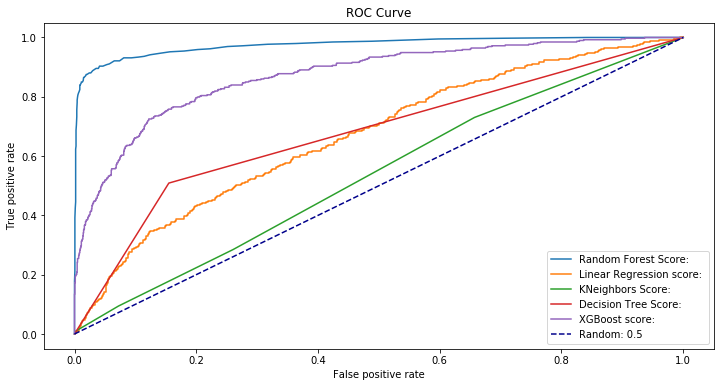

In [85]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr, tpr, label = 'Random Forest Score: ' )
plt.plot(fpr_lr, tpr_lr, label = 'Linear Regression score: '  )
plt.plot(fpr_knc, tpr_knc, label = 'KNeighbors Score: '  )
plt.plot(fpr_dt, tpr_dt, label = 'Decision Tree Score: ' )
plt.plot(fpr_xgbc, tpr_xgbc, label = 'XGBoost score: ' )
plt.plot([0,1], [0,1], 'k--',color='darkblue', linestyle='--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')

In [86]:
from sklearn.metrics import roc_auc_score
# Random Forest Clssifier
roc_auc_score(y_test, y_probs)

0.9750978147449691

In [87]:
#Linear Regressor
roc_auc_score(y_test, y4_probs)

0.6688580969707909

In [88]:
#KNeighbors
roc_auc_score(y_test, y5_probs)

0.5372574819769108

In [89]:
#Decision Tree
roc_auc_score(y_test, y7_probs)

0.6769793730039222

In [90]:
#XGBoost
roc_auc_score(y_test, y8_probs)

0.8729841295477325

OUR ACCURATE MODEL IS NOW XGBOOST 



# Save your model for production

In [ ]:
import joblib
filename = 'final_Bank_Churn_Model.sav'
joblib.dump(xclf, filename)

In [ ]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)